### Game of Life Rules
1. Any live cell with fewer than two live neighbors dies, as if by underpopulation
2. Any live cell with two or three neighbors lives on to the next generation
3. Any live cell with more than three live neighbors dies, as if by overpopulation
4. Any dead cell with exactly three live nieghbors becomes a live cell, as if by reproduction  

In [1]:
# Grid setup of the system
N = 100 #grid size
grid = rand(0:1,N,N);

In [2]:
# Function used to apply the Game of Life rules
# neighborSum takes in the current x and y coordinate of the cell and the matrix the cell
# is located in

function neighborSum(xcoord::Int64,ycoord::Int64,oGrid::Matrix{Int64})
    right = xcoord + 1
    if right > N
        right = 1
    end
    left = xcoord - 1
    if left === 0
        left = N
    end
    up = ycoord + 1
    if up > N
        up = 1
    end
    down = ycoord - 1
    if down === 0
        down = N
    end
    return oGrid[right,ycoord] + oGrid[left,ycoord] + oGrid[xcoord,up] + oGrid[xcoord,down] + oGrid[right,up] + oGrid[right,down] + oGrid[left,up] + oGrid[left,down]
end

neighborSum (generic function with 1 method)

In [3]:
#Make a new grid of the same size where we will enter the next state of the original grid

nextGrid = zeros(Int64, N,N);

In [4]:
#Store the old grid

steps = 100
store = [zeros(Int64, N,N) for _ in 1:steps];
store[1] = grid;

In [5]:
#Updating the old grid to new grid

function nextStep(oGrid::Matrix{Int64}, nGrid::Matrix{Int64})
    for i = 1:N
        for j = 1:N
            check = neighborSum(i,j,oGrid)
            if oGrid[i,j] === 1
                if check < 2 || check > 3
                    nGrid[i,j] = 0
                end
                if check === 2 || check === 3
                    nGrid[i,j] = 1
                end
            end
            if oGrid[i,j] === 0
                if check === 3
                    nGrid[i,j] = 1
                end
            end
        end
    end
end

nextStep (generic function with 1 method)

In [6]:
#Storing the old grid, then updating it to a new grid, then repeat loop

for k in 1:(steps - 1)
    nextStep(store[k],store[k+1])
end

┌ Info: Saved animation to 
│   fn = C:\Users\Matt\Documents\Acads\AY 21-22\215\Physics-215\anim.gif
└ @ Plots C:\Users\Matt\.julia\packages\Plots\yfzIY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Matt\\Documents\\Acads\\AY 21-22\\215\\Physics-215\\anim.gif")
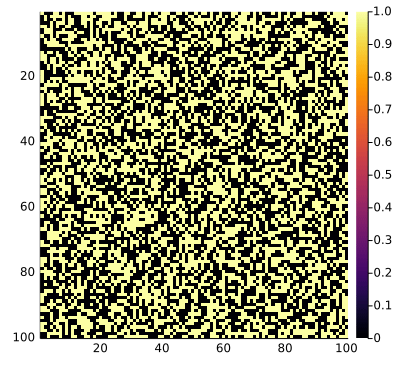

In [7]:
#Animating each step (grid)

using Plots
anim = @animate for i in store #we use this to save each grid as a frame for animation
    heatmap(i,
        yflip=true,
        size=(400,370))
end
gif(anim, "anim.gif", fps = 5) #animate the stored frames in a gif

In [8]:
#Still life simulation (block)

#Make a grid for a block
block = [0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 1 1 0 0 0 0;
         0 0 0 0 1 1 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;
         0 0 0 0 0 0 0 0 0 0;]

#Grid size
N = 10

10

In [9]:
#Make a new grid of the same size where we will enter the next state of the original grid

nextGrid_block = zeros(Int64, N,N);

In [10]:
#Store the old grid

steps_block = 10
store_block = [zeros(Int64, N,N) for _ in 1:steps_block];
store_block[1] = block;

In [11]:
#Storing the old grid, then updating it to a new grid, then repeat loop

for l in 1:(steps_block - 1)
    nextStep(store_block[l],store_block[l+1])
end

In [12]:
store_block;

┌ Info: Saved animation to 
│   fn = C:\Users\Matt\Documents\Acads\AY 21-22\215\Physics-215\animBlock.gif
└ @ Plots C:\Users\Matt\.julia\packages\Plots\yfzIY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Matt\\Documents\\Acads\\AY 21-22\\215\\Physics-215\\animBlock.gif")
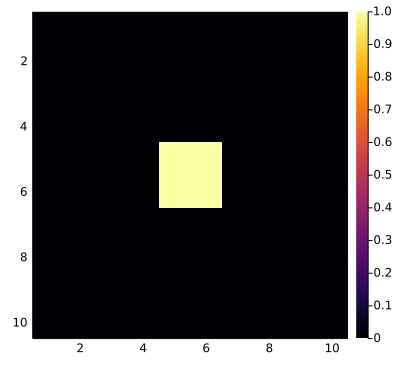

In [13]:
#Animating each step (grid)

anim = @animate for i in store_block
    heatmap(i,
        yflip=true,
        size=(400,370))
end
gif(anim, "animBlock.gif", fps = 5)

In [14]:
#Oscillator simulation (3-period star)

#Make a grid for a star
star = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
        0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
        0 0 0 0 0 0 0 1 0 0 0 0 0 0 0;
        0 0 0 0 0 0 1 1 1 0 0 0 0 0 0;
        0 0 0 0 1 1 1 0 1 1 1 0 0 0 0;
        0 0 0 0 1 0 0 0 0 0 1 0 0 0 0;
        0 0 0 1 1 0 0 0 0 0 1 1 0 0 0;
        0 0 1 1 0 0 0 0 0 0 0 1 1 0 0;
        0 0 0 1 1 0 0 0 0 0 1 1 0 0 0;
        0 0 0 0 1 0 0 0 0 0 1 0 0 0 0;
        0 0 0 0 1 1 1 0 1 1 1 0 0 0 0;
        0 0 0 0 0 0 1 1 1 0 0 0 0 0 0;
        0 0 0 0 0 0 0 1 0 0 0 0 0 0 0;
        0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
        0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

#Grid size
N = 15

15

In [15]:
#Make a new grid of the same size where we will enter the next state of the original grid

nextGrid_star = zeros(Int64, N,N);

In [16]:
#Store the old grid

steps_star = 13
store_star = [zeros(Int64, N,N) for _ in 1:steps_star];
store_star[1] = star;

In [17]:
#Storing the old grid, then updating it to a new grid, then repeat loop

for k in 1:(steps_star - 1)
    nextStep(store_star[k],store_star[k+1])
end

In [18]:
store_star;

┌ Info: Saved animation to 
│   fn = C:\Users\Matt\Documents\Acads\AY 21-22\215\Physics-215\animStar.gif
└ @ Plots C:\Users\Matt\.julia\packages\Plots\yfzIY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Matt\\Documents\\Acads\\AY 21-22\\215\\Physics-215\\animStar.gif")
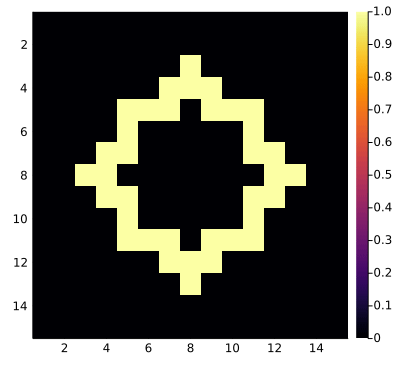

In [19]:
#Animating each step (grid)

anim = @animate for i in store_star
    heatmap(i,
        yflip=true,
        size=(400,370))
end
gif(anim, "animStar.gif", fps = 2)